# Projeto Sementes

## Contextualização

A cultura da soja (Glycine Max), durante todo o seu ciclo, está sujeita ao ataque de diferentes insetos-praga. A ação destes insetos-praga de solo pode causar falhas na lavoura na implantação da cultura, devido a eles se alimentarem: das sementes após a semeadura, de raízes após a germinação e da parte aérea das plântulas após a emergência, isso, na fase em que a planta em formação está mais suscetível a danos e morte.

O tratamento das sementes é considerado o método mais eficiente no controle de pragas incidentes, durante o desenvolvimento inicial das culturas agrícolas. Além disso, resultados de pesquisas têm evidenciado que alguns produtos, quando aplicados sozinhos e/ou em combinação com outros, podem, em determinadas situações, ocasionar redução na germinação das sementes, e também, na sobrevivência das plântulas, devido ao efeito de fitotoxicidade.

O uso preventivo de agroquímicos no tratamento de sementes é uma alternativa para evitar possíveis perdas decorrentes das ações de pragas de solo e da parte aérea. Essa prática vem sendo amplamente utilizada, pois confere à planta condições de defesa, possibilitando maior potencial para o desenvolvimento inicial da cultura e contribui para a obtenção do estande inicial almejado.

## Organização do Grupo

*   *Gerente do Projeto*: Lucas
*   *Documentação e Relatórios*: Lucas, Paloma e Vitor
*   *Desenvolvimento e Análises*: Alexsander, Arthur e **Lucas**

# Dúvidas Jardel


*   Devemos calcular as medidas descritivas e intervalos de confiança com n = 16 ou n = 4?

* Calcular intervalos de confiança para dias e para o tratamento?

* Margem de erro para proporção não binária?

* Diferença entre gráfico quantidade x porcentagem?



## Desenvolvimento

In [101]:
# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Tratamento dos Dados

In [159]:
# Coletando dados do Excel "DadosGeminacao"
dados_germinacao = pd.read_csv("https://raw.githubusercontent.com/Cizika/Projeto-Sementes/master/Dados/DadosGerminacao.csv", index_col=0, delimiter= ";")

In [160]:
# Renomeando a chave do indíce e das colunas
dados_germinacao.index.names = ['Tipo de tratamento']
dados_germinacao.columns.names = ['Dias pós-tratamento']

In [161]:
dados_germinacao

Dias pós-tratamento,0,5,10,15
Tipo de tratamento,,,,
Controle,3,3,3,3
A,2,2,2,2
B,3,3,4,4
C,3,2,3,3


In [112]:
# Criando dataframe dos dados de germinação em proporção (porcentagem) utilizando uma função lambda
dados_proporcao = dados_germinacao.apply(lambda x: 100 * x/dados_germinacao.shape[0])

In [113]:
dados_proporcao

Dias pós-tratamento,0,5,10,15
Tipo de tratamento,,,,
Controle,75.0,75.0,75.0,75.0
A,50.0,50.0,50.0,50.0
B,75.0,75.0,100.0,100.0
C,75.0,50.0,75.0,75.0


### Medidas Descritivas

In [26]:
# Função para calcular o coeficiente de variância (CV)
def coeficiente_variancia(table):
    return 100 * table.std() / table.mean()
# Função para calcular a amplitude
def amplitude(table):
    return table.max() - table.min()

# Utilizando método aggregate do Pandas para aplicar medidas de posição e dispersão ao DataFrame
medidas_descritivas = dados_proporcao.agg(["min","max","mean","median","var","std",coeficiente_variancia,amplitude])

In [27]:
# Renomeando index do DataFrame de medidas descritivas
novos_nomes = {
    "min":"Minimo",
    "max": "Maximo",
    "mean":"Media",
    "median": "Mediana",
    "var": "Variancia",
    "std": "Desvio-padrao",
    "coeficiente_variancia":"Coeficiente de Variancia",
    "amplitude":"Amplitude"
}
medidas_descritivas = medidas_descritivas.rename(novos_nomes)

In [29]:
# Arredondando casas decimais das medidas descritivas e de dispersão
medidas_descritivas = medidas_descritivas.round(3)

In [33]:
medidas_descritivas

,0,5,10,15
Minimo,50.000,50.000,50.000,50.000
Maximo,75.000,75.000,100.000,100.000
Media,68.750,62.500,75.000,75.000
Mediana,75.000,62.500,75.000,75.000
Variancia,156.250,208.333,416.667,416.667
Desvio-padrao,12.500,14.434,20.412,20.412
Coeficiente de Variancia,18.182,23.094,27.217,27.217
Amplitude,25.000,25.000,50.000,50.000


Análise

### Gráficos Gerais

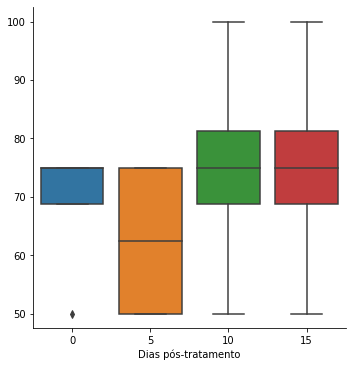

In [18]:
# Utilizando Seaborn para plotar boxplots
sns.catplot(kind="box", data=dados_proporcao)

In [193]:
# Criando dataframe com os dados empilhados e índices como coluna
dados_desempilhados_porcentagem = pd.DataFrame(dados_proporcao.stack(), columns = ["Porcentagem"]).reset_index()
dados_desempilhados_porcentagem.head()

,Tipo de tratamento,Dias pós-tratamento,Porcentagem
0,Controle,0,75.0
1,Controle,5,75.0
2,Controle,10,75.0
3,Controle,15,75.0
4,A,0,50.0


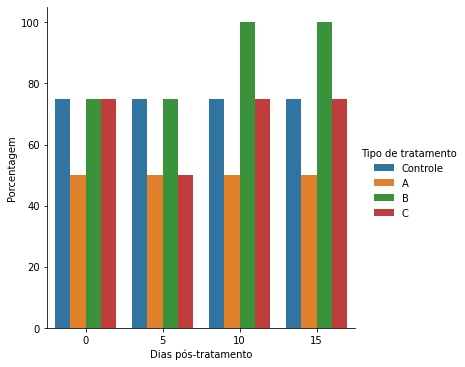

In [17]:
# Utilizando biblioteca Seaborn para plotar um gráfico de barras em porcentagem
sns.catplot(kind="bar",x='Dias pós-tratamento', y='Porcentagem', hue='Tipo de tratamento', data=dados_desempilhados_porcentagem)

In [199]:
# Desempilhando dados de germinação em Quantidade
dados_desempilhados_quantidade = pd.DataFrame(dados_germinacao.stack(), columns = ["Quantidade"]).reset_index()
dados_desempilhados_quantidade.head()

,Tipo de tratamento,Dias pós-tratamento,Quantidade
0,Controle,0,3
1,Controle,5,3
2,Controle,10,3
3,Controle,15,3
4,A,0,2


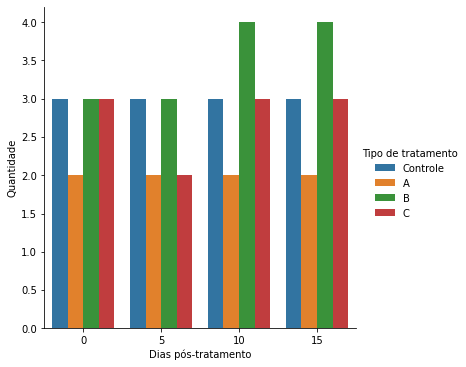

In [200]:
# Utilizando biblioteca Seaborn para plotar um gráfico de barras
sns.catplot(kind="bar",x='Dias pós-tratamento', y='Quantidade', hue='Tipo de tratamento', data=dados_desempilhados_quantidade)

### Incertezas e Comparações Estatísticas

In [ ]:
# Calcular os intervalos de confianças
# Realizar Comparações estatísticas com base nesses intervalos
# Analisar os resultados
# Responsável: Arthur

In [114]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para sementes tratadas após ZERO dias
intervalo_zero_dias = 2 * np.sqrt(medidas_descritivas["0"]["Variancia"]/16)

# Calculando Limite inferior para sementes 0 dias
lim_inf = medidas_descritivas["0"]["Media"] - intervalo_zero_dias

# Calculando Limite superior para sementes 0 dias
lim_sup = medidas_descritivas["0"]["Media"] + intervalo_zero_dias

print("O Intervalo de confiança de 95% para as sementes armazenadas por 0 dias é de (" + str(lim_inf) + ", " + str(lim_sup) + ").")

O Intervalo de confiança de 95% para as sementes armazenadas por 0 dias é de (62.5, 75.0).


In [50]:
# Margem de erro
# margem_erro = 2*np.sqrt((mean * (1 - mean)) / n)
margem_erro = 2 * np.sqrt((0.69 * (1 - 0.69))/16) # Para 0 dias
print(margem_erro)

0.23124662159694356


In [ ]:
# Comparação entre médias, diferença entre as duas médias populacionais se distancia, 
# provalvelmente 'diferenca' da diferenca amostral 
# diferenca = 2*np.sqrt((var1/n1) + (var2/n2))
diferenca = 2*np.sqrt((208/4) + (156/4)) # 5 dias - 0 dias
diferenca 

9.539392014169456

In [49]:
# Tamanho amostral
# tam_amost = (4*var)/(pow(0.05, 0.05))
tam_amost = (4*medidas_descritivas["0"]["Variancia"])/(pow(0.05, 0.05)) # Todas as variâncias? 
tam_amost

725.9914685259639

### Segmentação de Dados

In [164]:
# Construindo Tabela de Contigência entre DIAS PÓS-TRATAMENTO e TIPO DE TRATAMENTO
tabela_contingencia = dados_germinacao.copy()
tabela_contingencia.loc['Total'] = tabela_contingencia.sum(axis=0).astype(int)
tabela_contingencia['Total'] = tabela_contingencia.sum(axis=1).astype(int)

In [165]:
tabela_contingencia.head()

Dias pós-tratamento,0,5,10,15,Total
Tipo de tratamento,,,,,
Controle,3,3,3,3,12
A,2,2,2,2,8
B,3,3,4,4,14
C,3,2,3,3,11
Total,11,10,12,12,45


In [178]:
# Segmentando com base na variável TIPO DE TRATAMENTO
# Criando DataFrame para porcentagem de sementes germinadas do ttotal
tratamento_germinadas = pd.DataFrame(columns = ["Porcentagem do Total de Germinadas"])

# Coletando o número total de sementes germinadas
total_germinadas = tabela_contingencia.loc['Total']['Total']

# Calculando porcentagem do número total de sementes germinadas em cada tipo de tratamento
tratamento_germinadas["Porcentagem do Total de Germinadas"] = 100 *  tabela_contingencia['Total'][:4] / total_germinadas

# Arredondando porcentagens em 3 casas decimais
tratamento_germinadas = round(tratamento_germinadas, 3)

In [179]:
tratamento_germinadas.head()

,Porcentagem do Total de Germinadas
Tipo de tratamento,
Controle,26.667
A,17.778
B,31.111
C,24.444


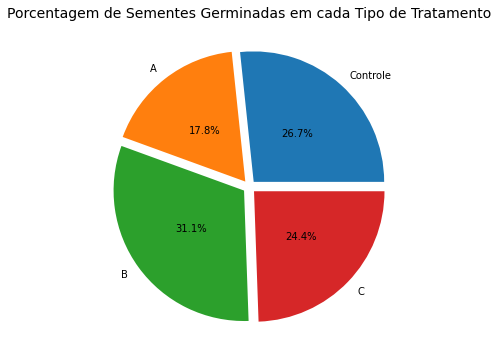

In [177]:
# Plotando um gráfico de pizza com a porcentagem com base no tratamento dado
pie, ax = plt.subplots(figsize=[10,6])
labels = list(tratamento_germinadas.index)
plt.pie(x=np.array(tratamento_germinadas).ravel(), autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Porcentagem de Sementes Germinadas em cada Tipo de Tratamento", fontsize=14);
pie.savefig("PorcentagemPorTratamento.png")

In [184]:
# Segmentando com base na variável DIAS PÓS-TRATAMENTO
# Criando DataFrame para porcentagem de sementes germinadas do total
dias_germinadas = pd.DataFrame(columns = ["Porcentagem do Total de Germinadas"])

# Calculando porcentagem do número total de sementes germinadas em cada período pós-tratamento
dias_germinadas["Porcentagem do Total de Germinadas"] = 100 *  tabela_contingencia.loc['Total'][:4] / total_germinadas

# Arredondando porcentagens em 3 casas decimais
dias_germinadas = round(dias_germinadas, 3)

In [186]:
dias_germinadas.head()

,Porcentagem do Total de Germinadas
Dias pós-tratamento,
0,24.444
5,22.222
10,26.667
15,26.667


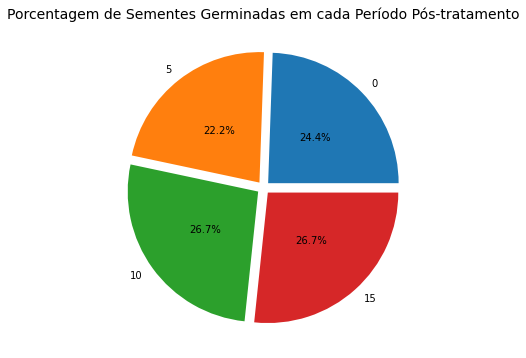

In [183]:
# Plotando um gráfico de pizza com a porcentagem com base no tratamento dado
pie, ax = plt.subplots(figsize=[10,6])
labels = list(dias_germinadas.index)
plt.pie(x=np.array(dias_germinadas).ravel(), autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Porcentagem de Sementes Germinadas em cada Período Pós-tratamento", fontsize=14);
pie.savefig("PorcentagemPorDia.png")